# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense , Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

os.environ['OMP_NUM_THREADS'] = '-1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.1.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('C:/Users/Tiam/Desktop/Class Challenge/Covid_Data_GradientCrescent')
DATASET_PATH  = 'C:/Users/Tiam/Desktop/Class Challenge/Covid_Data_GradientCrescent/two/train'
TEST_DIR =  'C:/Users/Tiam/Desktop/Class Challenge/Covid_Data_GradientCrescent/two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

C:\Users\Tiam\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
# here we are going to make our model that uses VGG16 plus additional models
vgg19 = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')
vgg19.trainable = False 

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.summary()        

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

In [5]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

# going to add the optimizer here 
adam = Adam(LEARNING_RATE)

model.compile(optimizer=adam,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

t0 = time.time()
history = model.fit(train_batches,
#                     callbacks=[callback],
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_batches,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=NUM_EPOCHS)


print(f"it took the model :{(time.time()-t0)/100} minutes to train")

11
3


C:\Users\Tiam\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Tiam\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 2 steps
Epoch 1/40


C:\Users\Tiam\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Tiam\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 18s 2s/step - loss: 0.7035 - accuracy: 0.5319 - val_loss: 0.5430 - val_accuracy: 0.7500
Epoch 2/40
10/10 [==============================] - 17s 2s/step - loss: 0.6129 - accuracy: 0.6489 - val_loss: 0.4349 - val_accuracy: 0.9500
Epoch 3/40
10/10 [==============================] - 17s 2s/step - loss: 0.6565 - accuracy: 0.6277 - val_loss: 0.3917 - val_accuracy: 0.9000
Epoch 4/40
10/10 [==============================] - 17s 2s/step - loss: 0.5400 - accuracy: 0.7553 - val_loss: 0.3583 - val_accuracy: 0.9000
Epoch 5/40
10/10 [==============================] - 17s 2s/step - loss: 0.4967 - accuracy: 0.7766 - val_loss: 0.2539 - val_accuracy: 0.9500
Epoch 6/40
10/10 [==============================] - 19s 2s/step - loss: 0.4951 - accuracy: 0.7979 - val_loss: 0.2166 - val_accuracy: 0.9500
Epoch 7/40
10/10 [==============================] - 18s 2s/step - loss: 0.4147 - accuracy: 0.8085 - val_loss: 0.2224 - val_accuracy: 0.9500
Epoch 8/40
10/10 [=============

#### [5 points] Plot Accuracy and Loss During Training

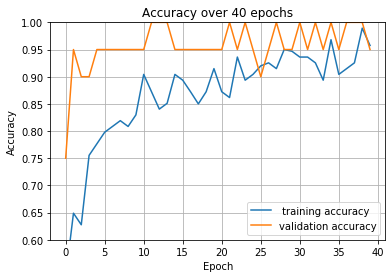

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label=' training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title("Accuracy over 40 epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='lower right')
plt.grid(True)

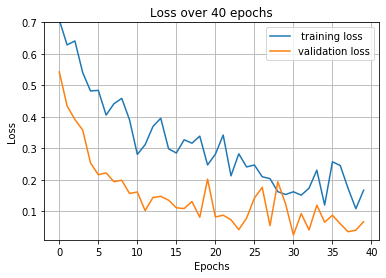

In [7]:
plt.plot(history.history['loss'], label=' training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title("Loss over 40 epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0.01, .7])
plt.legend(loc='upper right')
plt.grid(True)

#### Plot Test Results

Found 18 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
18/18 [==============================] - 3s 165ms/step
covid\nejmoa2001191_f3-PA.jpeg


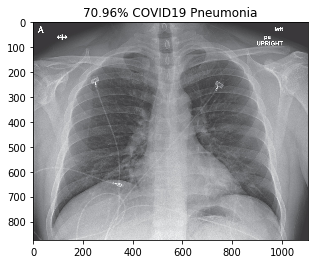

covid\nejmoa2001191_f4.jpeg


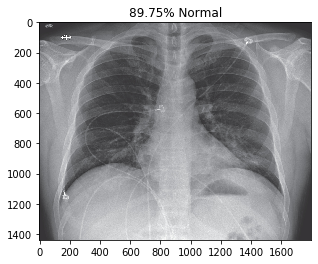

covid\nejmoa2001191_f5-PA.jpeg


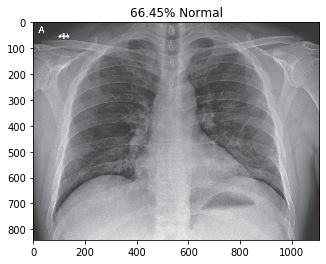

covid\radiol.2020200490.fig3.jpeg


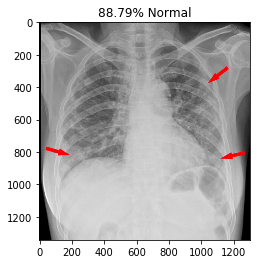

covid\ryct.2020200028.fig1a.jpeg


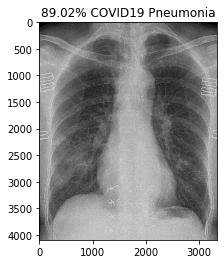

covid\ryct.2020200034.fig2.jpeg


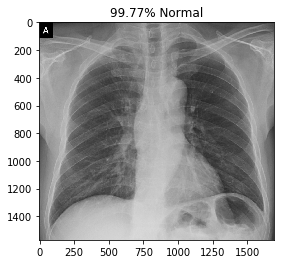

covid\ryct.2020200034.fig5-day0.jpeg


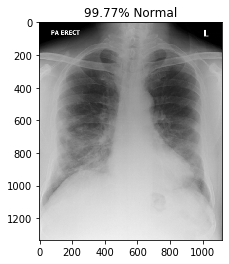

covid\ryct.2020200034.fig5-day4.jpeg


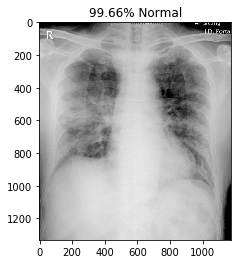

covid\ryct.2020200034.fig5-day7.jpeg


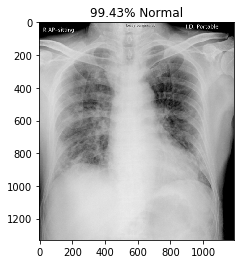

normal\NORMAL2-IM-1385-0001.jpeg


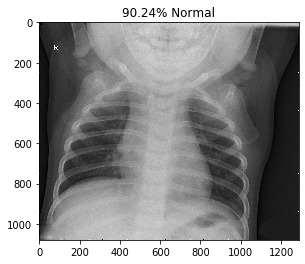

normal\NORMAL2-IM-1396-0001.jpeg


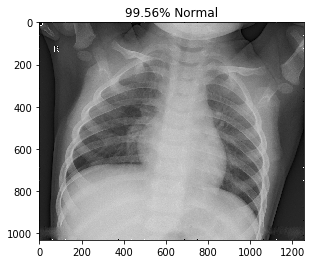

normal\NORMAL2-IM-1400-0001.jpeg


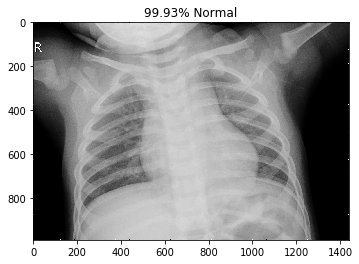

normal\NORMAL2-IM-1401-0001.jpeg


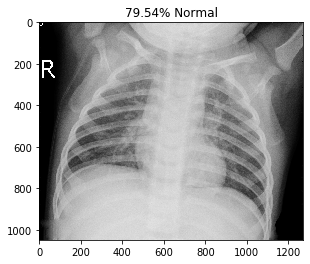

normal\NORMAL2-IM-1406-0001.jpeg


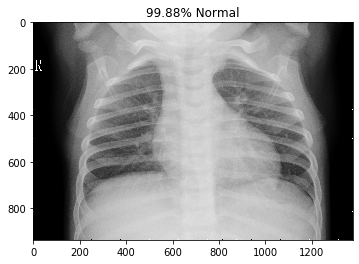

normal\NORMAL2-IM-1412-0001.jpeg


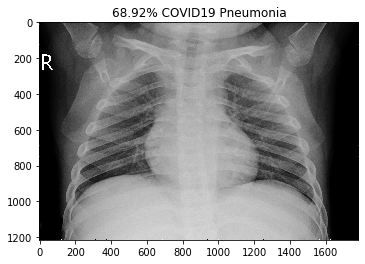

normal\NORMAL2-IM-1419-0001.jpeg


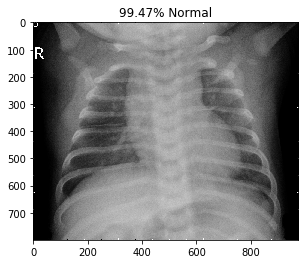

normal\NORMAL2-IM-1422-0001.jpeg


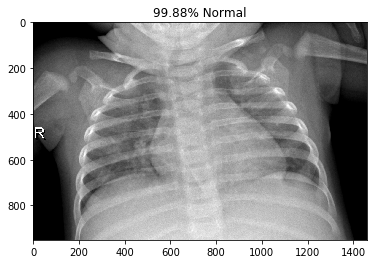

normal\NORMAL2-IM-1423-0001.jpeg


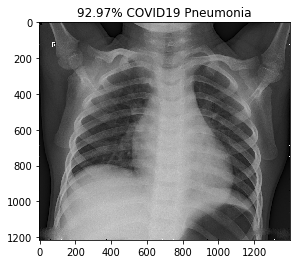

In [8]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

In [9]:
print(f"Test Loss: {pred[0]}")
print(f"Test Accuracy: {pred[1]}")


Test Loss: [0.2903622]
Test Accuracy: [0.89750785]


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

In [15]:
from sklearn.manifold import TSNE

intermediate_layer_model = Model(inputs=model.input,
                                        outputs=model.get_layer('dense_2').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

vals = intermediate_layer_model.predict(tsne_data_generator)


visual = TSNE(n_components=2).fit_transform(vals)




Found 130 images belonging to 2 classes.


Text(0.5, 1.0, 'Corona Virus X-rays vs Normal Patients')

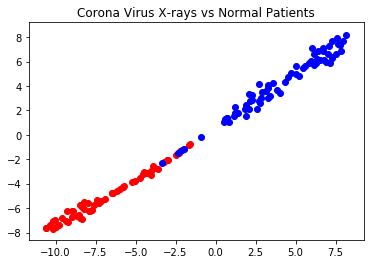

In [16]:
for data,label in zip(visual,tsne_data_generator.classes):
    if label == 0:
        plt.scatter(data[0],data[1],label=label,color='red')
    else:
        plt.scatter(data[0],data[1],label=label,color='blue')

plt.title("Corona Virus X-rays vs Normal Patients")